In [8]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('../data/marketing.csv')
df.head()

,youtube,facebook,newspaper,sales
0,276.12,45.36,83.04,26.52
1,53.40,47.16,54.12,12.48
2,20.64,55.08,83.16,11.16
3,181.80,49.56,70.20,22.20
4,216.96,12.96,70.08,15.48


In [10]:
Y = df['sales']
D = df['newspaper']


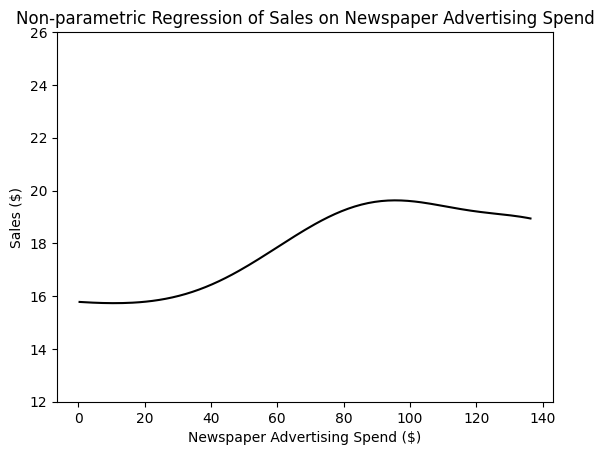

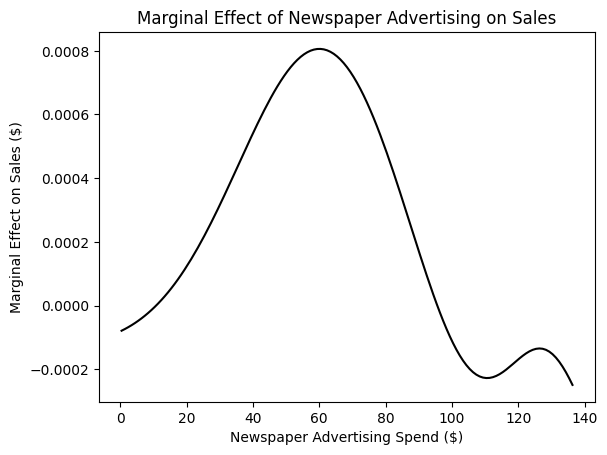

In [11]:
x_axis = np.arange(min(D), max(D))
results = sm.nonparametric.KernelReg(Y, D, 
        var_type='c', 
        bw='cv_ls',
        reg_type='lc').fit(x_axis)

plt.plot(x_axis, results[0], color='black') # Plot average sales
plt.xlabel('Newspaper Advertising Spend ($)')
plt.ylabel('Sales ($)')
plt.title('Non-parametric Regression of Sales on Newspaper Advertising Spend')
plt.ylim([12, 26])
plt.show()
plt.plot(x_axis, results[1], color='black') # Plot impact
plt.ylabel('Marginal Effect on Sales ($)')
plt.title('Marginal Effect of Newspaper Advertising on Sales')
plt.xlabel('Newspaper Advertising Spend ($)')
plt.show()



## Interoaretation of A/B Test Results
In this marketing example between the treatment (newspaper spend) and outcome (sales), we observe that on average the newspaper spend has a positive effect on sales. However, this is not the case for spend beyond $100K as the outcome starts to decline. This suggests that there are diminishing returns to newspaper spend, and that there may be an optimal level of spend beyond which additional investment does not yield proportional increases in sales.

We also observe the marginal effect of newspaper spend on sales by calculating the derivative of the sales with respect to newspaper spend. The marginal effect is positive for newspaper spend up to $60K, indicating that each additional dollar spent on newspaper advertising leads to an increase in sales. However, beyond $60K, the marginal effect becomes negative, suggesting that further increases in newspaper spend actually lead to a decrease in sales. This highlights the importance of carefully considering the level of investment in advertising and its potential impact on sales outcomes.